### Importing Libraries

In [36]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN

#### Reading csv

In [37]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False
1,1,56.95,1889.50,0,True,False,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,2,53.85,108.15,1,True,False,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,3,42.30,1840.75,0,True,False,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,4,70.70,151.65,1,True,False,True,False,False,True,...,False,False,True,False,True,False,False,False,False,False


In [38]:
df=df.drop('Unnamed: 0',axis=1)

In [39]:
x=df.drop('Churn',axis=1)
x

,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,False,True,True,False,True,False,False,True,...,False,False,True,False,True,False,False,False,False,False
1,56.95,1889.50,True,False,True,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,53.85,108.15,True,False,True,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,42.30,1840.75,True,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,70.70,151.65,True,False,True,False,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,84.80,1990.50,False,True,False,True,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False
7028,103.20,7362.90,False,True,False,True,False,True,False,True,...,False,True,False,False,False,False,False,False,False,True
7029,29.60,346.45,False,True,False,True,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
7030,74.40,306.60,False,True,True,False,False,True,False,True,...,False,False,False,True,True,False,False,False,False,False


In [40]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

##### Train Test Split

In [41]:
sm=SMOTEENN(random_state=42)
x_train1,y_train1 = sm.fit_resample(x,y)
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_train1,y_train1,test_size=0.2,random_state=42)

#### Decision Tree 
because it can:
Better handles non-linear relationships between features
No feature scaling required
Can automatically capture feature interactions

In [42]:
from sklearn.tree import DecisionTreeClassifier
model_log=DecisionTreeClassifier(max_depth=12,
    min_samples_split=8,
    min_samples_leaf=4,
    criterion='gini',
    class_weight='balanced',
    random_state=100)

In [43]:
model_log.fit(x_train_1,y_train_1)

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=4, min_samples_split=8,
                       random_state=100)

In [44]:
y_pred=model_log.predict(x_test_1)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [45]:
model_log.score(x_test_1,y_test_1)

0.9432684165961049

In [46]:
print(classification_report(y_test_1, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       548
           1       0.95      0.94      0.95       633

    accuracy                           0.94      1181
   macro avg       0.94      0.94      0.94      1181
weighted avg       0.94      0.94      0.94      1181



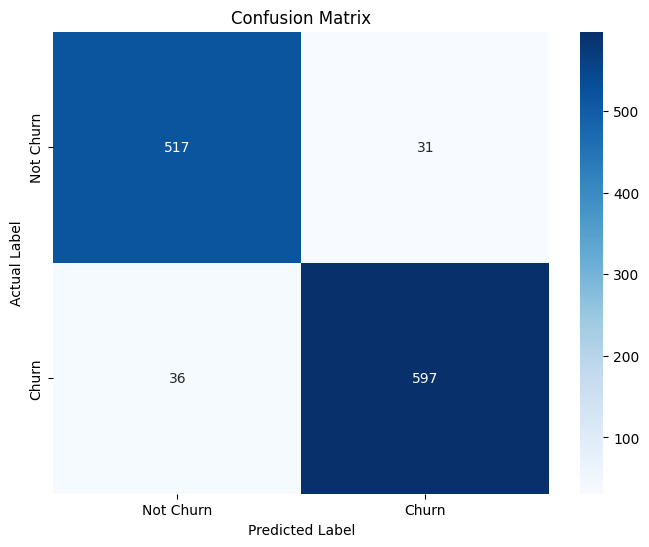

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred):
    # Create figure
    plt.figure(figsize=(8, 6))
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Churn', 'Churn'],
                yticklabels=['Not Churn', 'Churn'])
    
    # Add labels and title
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    
    plt.show()

plot_confusion_matrix(y_test_1,y_pred)

In [48]:
import pickle

In [49]:
filename = 'model.sav'

In [50]:
pickle.dump(model_log, open(filename, 'wb'))

In [51]:
load_model = pickle.load(open(filename, 'rb'))

In [52]:
load_model.score(x_test_1,y_test_1)

0.9432684165961049